# 1 Pengumpulan Data

## 1.1 Load dataset

In [ ]:
# library untuk load dan read data
import pandas as pd

# load dataset heart failure UCI Machine Learning yang telah diletakan pada Github
url_dataset = 'https://raw.githubusercontent.com/andr0medaz/Heart-Failure-Clinical-Records/refs/heads/main/heart_failure_clinical_records_dataset.csv'
df = pd.read_csv(url_dataset)

## 1.2 Exploratory Data Analysis (EDA)

In [ ]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [ ]:
# cek tipe data semua feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
# cek missing value semua feature
df.isnull().sum()

,0
age,0
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0


In [ ]:
cek_class = df['DEATH_EVENT'].value_counts()
cek_class

,count
DEATH_EVENT,
0,203
1,96


# 2 Preprocessing Data

## 2.1 Split data

In [ ]:
# library untuk split data
from sklearn.model_selection import train_test_split

# memisahkan feature dan class target
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

# note : X_train dan y_train adalah data normal tanpa penanganan imbalance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## 2.2 SMOTE

In [ ]:
# library untuk oversampling SMOTE
from imblearn.over_sampling import SMOTE
# library untuk menghitung hasil penanganan imbalance
from collections import Counter

# Inisialisasi SMOTE
smote = SMOTE(random_state=42)

# Fit dan resample
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f"Sebelum SMOTE: {Counter(y_train)}")
print(f"Setelah SMOTE: {Counter(y_train_smote)}")

Sebelum SMOTE: Counter({0: 162, 1: 77})
Setelah SMOTE: Counter({0: 162, 1: 162})



## 2.3 Near Miss

In [ ]:
# library untuk undersampling NearMiss
from imblearn.under_sampling import NearMiss
# library untuk menghitung hasil penanganan imbalance
from collections import Counter

# Inisialisasi NearMiss
nearmiss = NearMiss()

# Fit dan resample
X_train_nearmiss, y_train_nearmiss = nearmiss.fit_resample(X_train, y_train)

print(f"Sebelum SMOTE: {Counter(y_train)}")
print(f"Setelah SMOTE: {Counter(y_train_nearmiss)}")

Sebelum SMOTE: Counter({0: 162, 1: 77})
Setelah SMOTE: Counter({0: 77, 1: 77})


# 3 Modeling Random Forest (Train)

## 3.1 Normal

In [ ]:
# library model random forest dengan grid search
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf_grid = RandomForestClassifier(random_state=42)

# parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [2, 4],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [2, 3],
}

# membuat grid search
grid_search = GridSearchCV(
    rf_grid,
    param_grid,
)

# train model random forest dengan grid search
grid_search.fit(X_train, y_train)
best_model_normal = grid_search.best_estimator_
print("Best Params (Normal):", grid_search.best_params_)

Best Params (Normal): {'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}


In [ ]:
# library untuk evaluasi hasil train
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score
)
import seaborn as sns
import matplotlib.pyplot as plt

# Prediksi data training
y_train_pred_gs = best_model_normal.predict(X_train)

# Evaluasi metrik
print("=== Evaluasi Train (Best Model - Grid Search Normal) ===")
print("Accuracy:", accuracy_score(y_train, y_train_pred_gs))
print("Precision:", precision_score(y_train, y_train_pred_gs))
print("Recall:", recall_score(y_train, y_train_pred_gs))
print("F1 Score:", f1_score(y_train, y_train_pred_gs))
print("\nClassification Report:\n", classification_report(y_train, y_train_pred_gs))



=== Evaluasi Train (Best Model - Grid Search Normal) ===
Accuracy: 0.9246861924686193
Precision: 0.9402985074626866
Recall: 0.8181818181818182
F1 Score: 0.875

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       162
           1       0.94      0.82      0.88        77

    accuracy                           0.92       239
   macro avg       0.93      0.90      0.91       239
weighted avg       0.93      0.92      0.92       239



## 3.2 SMOTE

In [ ]:
# library model random forest dengan grid search
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# parameter grid
rf_grid = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [2, 4],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [2, 3],
}

# membuat grid search
grid_search_smote = GridSearchCV(
    rf_grid,
    param_grid,
)

# train model random forest dengan grid search
grid_search_smote.fit(X_train_smote, y_train_smote)
best_model_smote = grid_search_smote.best_estimator_
print("Best Params (SMOTE):", grid_search_smote.best_params_)

Best Params (SMOTE): {'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}


In [ ]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score
)
import seaborn as sns
import matplotlib.pyplot as plt

# Prediksi pada data train SMOTE
y_train_pred_smote = best_model_smote.predict(X_train_smote)

# Evaluasi metrik
print("=== Evaluasi Train (Best Model - Grid Search SMOTE) ===")
print("Accuracy:", accuracy_score(y_train_smote, y_train_pred_smote))
print("Precision:", precision_score(y_train_smote, y_train_pred_smote))
print("Recall:", recall_score(y_train_smote, y_train_pred_smote))
print("F1 Score:", f1_score(y_train_smote, y_train_pred_smote))
print("\nClassification Report:\n", classification_report(y_train_smote, y_train_pred_smote))



=== Evaluasi Train (Best Model - Grid Search SMOTE) ===
Accuracy: 0.9259259259259259
Precision: 0.9367088607594937
Recall: 0.9135802469135802
F1 Score: 0.925

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       162
           1       0.94      0.91      0.93       162

    accuracy                           0.93       324
   macro avg       0.93      0.93      0.93       324
weighted avg       0.93      0.93      0.93       324



## 3.3 NearMiss

In [ ]:
# library model random forest dengan grid search
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# parameter grid
rf_grid = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [2, 4],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [2, 3],
}

# membuat grid search
grid_search_nearmiss = GridSearchCV(
    rf_grid,
    param_grid,
)

# train model random forest dengan grid search
grid_search_nearmiss.fit(X_train_nearmiss, y_train_nearmiss)
best_model_nearmiss = grid_search_nearmiss.best_estimator_
print("Best Params (NearMiss):", grid_search_nearmiss.best_params_)

Best Params (NearMiss): {'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}


In [ ]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score
)
import seaborn as sns
import matplotlib.pyplot as plt

# Prediksi data train (NearMiss)
y_train_pred_nearmiss = best_model_nearmiss.predict(X_train_nearmiss)

# Evaluasi metrik
print("=== Evaluasi Train (Best Model - Grid Search NearMiss) ===")
print("Accuracy:", accuracy_score(y_train_nearmiss, y_train_pred_nearmiss))
print("Precision:", precision_score(y_train_nearmiss, y_train_pred_nearmiss))
print("Recall:", recall_score(y_train_nearmiss, y_train_pred_nearmiss))
print("F1 Score:", f1_score(y_train_nearmiss, y_train_pred_nearmiss))
print("\nClassification Report:\n", classification_report(y_train_nearmiss, y_train_pred_nearmiss))



=== Evaluasi Train (Best Model - Grid Search NearMiss) ===
Accuracy: 0.9025974025974026
Precision: 0.9305555555555556
Recall: 0.8701298701298701
F1 Score: 0.8993288590604027

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91        77
           1       0.93      0.87      0.90        77

    accuracy                           0.90       154
   macro avg       0.90      0.90      0.90       154
weighted avg       0.90      0.90      0.90       154



# 4 Pengujian Model (Test)

## 4.1 Normal

In [ ]:
# library untuk evaluasi
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score
)

# library untuk visualisasi hasil evaluasi
import matplotlib.pyplot as plt
import seaborn as sns

=== Evaluasi Test (Best Model - Normal) ===
Accuracy: 0.8333333333333334
Precision: 0.8461538461538461
Recall: 0.5789473684210527
F1 Score: 0.6875

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.95      0.89        41
           1       0.85      0.58      0.69        19

    accuracy                           0.83        60
   macro avg       0.84      0.77      0.79        60
weighted avg       0.83      0.83      0.82        60



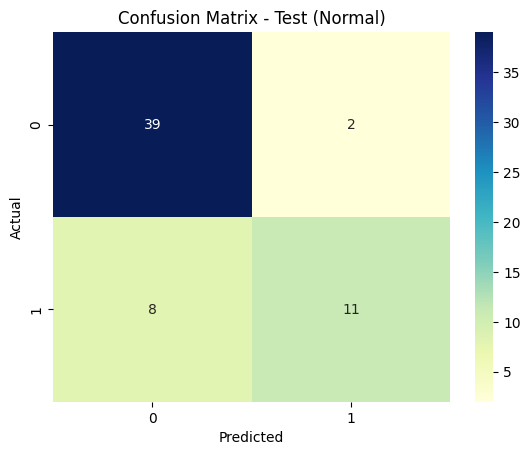

In [ ]:
y_test_pred_normal = best_model_normal.predict(X_test)

print("=== Evaluasi Test (Best Model - Normal) ===")
print("Accuracy:", accuracy_score(y_test, y_test_pred_normal))
print("Precision:", precision_score(y_test, y_test_pred_normal))
print("Recall:", recall_score(y_test, y_test_pred_normal))
print("F1 Score:", f1_score(y_test, y_test_pred_normal))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred_normal))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_test_pred_normal), annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix - Test (Normal)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## 4.2 SMOTE

=== Evaluasi Test (Best Model - SMOTE) ===
Accuracy: 0.8666666666666667
Precision: 0.8235294117647058
Recall: 0.7368421052631579
F1 Score: 0.7777777777777778

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90        41
           1       0.82      0.74      0.78        19

    accuracy                           0.87        60
   macro avg       0.85      0.83      0.84        60
weighted avg       0.86      0.87      0.86        60



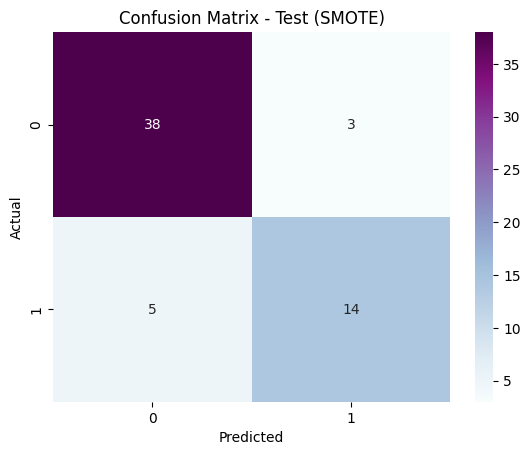

In [ ]:
y_test_pred_smote = best_model_smote.predict(X_test)

print("=== Evaluasi Test (Best Model - SMOTE) ===")
print("Accuracy:", accuracy_score(y_test, y_test_pred_smote))
print("Precision:", precision_score(y_test, y_test_pred_smote))
print("Recall:", recall_score(y_test, y_test_pred_smote))
print("F1 Score:", f1_score(y_test, y_test_pred_smote))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred_smote))

sns.heatmap(confusion_matrix(y_test, y_test_pred_smote), annot=True, fmt='d', cmap='BuPu')
plt.title("Confusion Matrix - Test (SMOTE)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## 4.3 NearMiss

=== Evaluasi Test (Best Model - NearMiss) ===
Accuracy: 0.8
Precision: 0.6666666666666666
Recall: 0.7368421052631579
F1 Score: 0.7

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.83      0.85        41
           1       0.67      0.74      0.70        19

    accuracy                           0.80        60
   macro avg       0.77      0.78      0.77        60
weighted avg       0.81      0.80      0.80        60



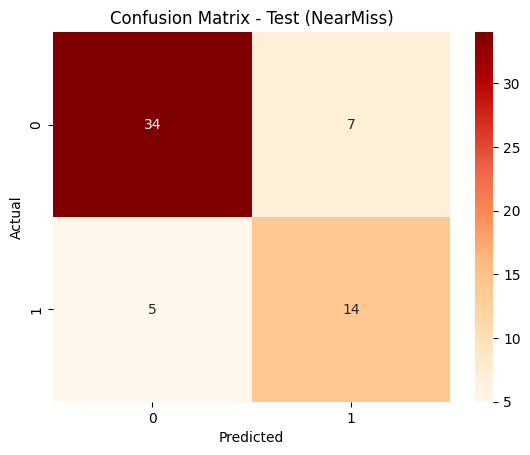

In [ ]:
y_test_pred_nearmiss = best_model_nearmiss.predict(X_test)

print("=== Evaluasi Test (Best Model - NearMiss) ===")
print("Accuracy:", accuracy_score(y_test, y_test_pred_nearmiss))
print("Precision:", precision_score(y_test, y_test_pred_nearmiss))
print("Recall:", recall_score(y_test, y_test_pred_nearmiss))
print("F1 Score:", f1_score(y_test, y_test_pred_nearmiss))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred_nearmiss))

sns.heatmap(confusion_matrix(y_test, y_test_pred_nearmiss), annot=True, fmt='d', cmap='OrRd')
plt.title("Confusion Matrix - Test (NearMiss)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 5 Membandingkan Pengujian

## 5.1 Confusion Matrik

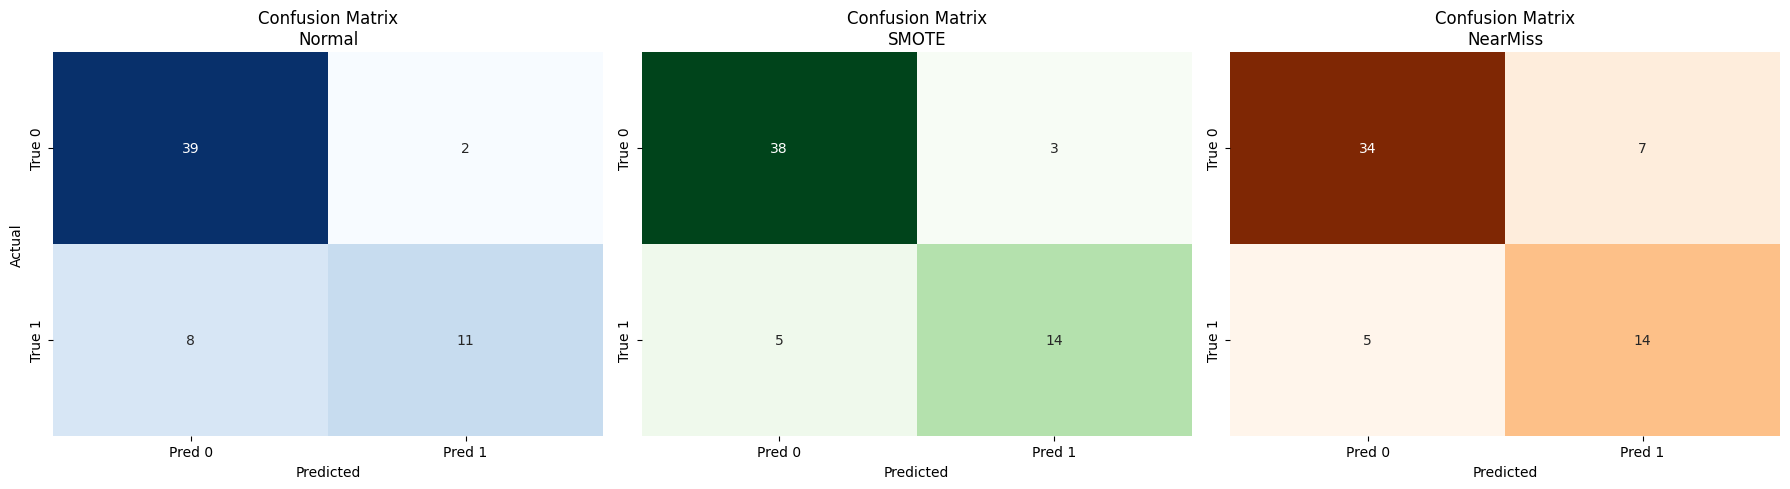

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Confusion matrix untuk setiap model
cm_normal = confusion_matrix(y_test, y_test_pred_normal)
cm_smote = confusion_matrix(y_test, y_test_pred_smote)
cm_nearmiss = confusion_matrix(y_test, y_test_pred_nearmiss)

# Confusion matrix model Random Forest + data normal
sns.heatmap(cm_normal, annot=True, fmt='d', cmap='Blues', ax=axes[0], cbar=False,
            xticklabels=['Pred 0', 'Pred 1'],
            yticklabels=['True 0', 'True 1'])
axes[0].set_title('Confusion Matrix\nNormal')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Confusion matrix model Random Forest + SMOTE
sns.heatmap(cm_smote, annot=True, fmt='d', cmap='Greens', ax=axes[1], cbar=False,
            xticklabels=['Pred 0', 'Pred 1'],
            yticklabels=['True 0', 'True 1'])
axes[1].set_title('Confusion Matrix\nSMOTE')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('')

# Confusion matrix model Random Forest + NearMiss
sns.heatmap(cm_nearmiss, annot=True, fmt='d', cmap='Oranges', ax=axes[2], cbar=False,
            xticklabels=['Pred 0', 'Pred 1'],
            yticklabels=['True 0', 'True 1'])
axes[2].set_title('Confusion Matrix\nNearMiss')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('')

plt.tight_layout()
plt.show()
